### Importing libraries


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Advertising(1).csv')

### Dataframe check for count,sum, null values

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df. rename(columns = {'Unnamed: 0':'Index'},inplace = True)

In [9]:
df.head()

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df=df.set_index('Index')

In [11]:
df.head()

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Visualisation of data

In [42]:
TV=df['TV']
radio=df['radio']
NP=df['newspaper']
sales=df['sales']

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

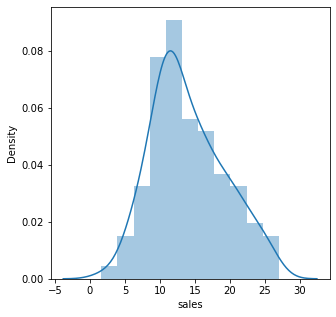

In [45]:
sns.distplot(sales)

###### Distribution plot shows sales is following normal distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

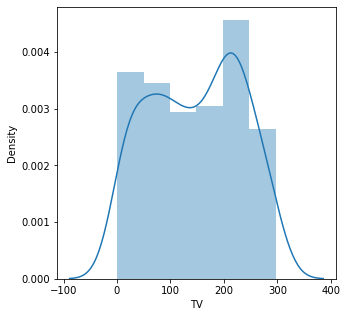

In [46]:
sns.distplot(TV)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

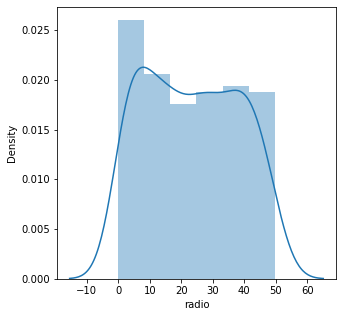

In [51]:
sns.distplot(radio)

###### Distribution for both TV and Radio are following uniform distribution.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

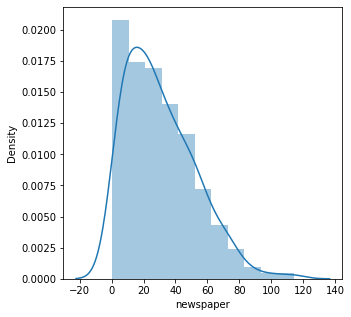

In [52]:
sns.distplot(NP)

###### Newspaper distribution is right-skewed data

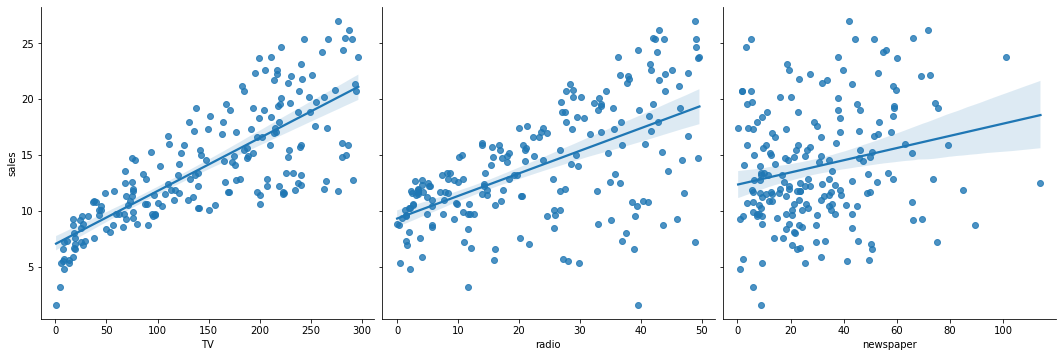

In [65]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars=['sales'],height = 5, aspect=1.0,kind = 'reg')

#reg : to perform linear regression on the graph

The TV and sales show a very strong relationship through this linear regression model. whereas, somewhat, weaker relationship is assumed between radio and sales and newspaper and sales have the weakest relationship

In [68]:
#MAX VALUE OF CORRELATION IS BETWEEN TV AND SALES
df.TV.corr(df.sales)

0.7822244248616061

#### Plotting correlation matrix and heat map to validate the results

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


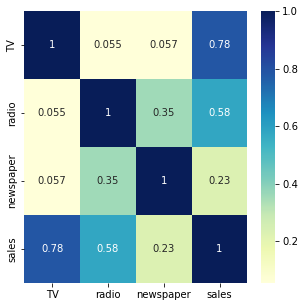

In [69]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.rcParams['figure.figsize']=(4,4)
plt.show()


#### The results proved above seems similar to the correlation matrix with strongest relation between TV and SALES.

### BUILDING LINEAR REGRESSION MODEL

In [73]:
X=df[['TV']]
print(X.shape)
print(type(X))

(200, 1)
<class 'pandas.core.frame.DataFrame'>


In [74]:
print(X.head())

          TV
Index       
1      230.1
2       44.5
3       17.2
4      151.5
5      180.8


In [131]:
Y=df['sales']

In [132]:
print(type(Y))
print(Y.shape)


<class 'pandas.core.series.Series'>
(200,)


In [133]:
Y.head()

Index
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
# using 30 percent data for test

##### Printing X_train,Y_train and X_test and Y_test

In [136]:
print(X_train.shape)

(140, 1)


In [137]:
print(Y_train.shape)

(140,)


In [138]:
print(X_test.shape)

(60, 1)


In [139]:
print(Y_test.shape)

(60,)


In [140]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [141]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

##### Interpret model

In [142]:
print(model.intercept_)
print(model.coef_)

#Model intercept tells us the constant term in linear regression equation
#Model coefficient tells us the Coefficient of x term in linear regression equation

6.923519536059554
[0.04812204]


#### Predictions with the Model

In [143]:
y_pred = model.predict(X_test)

In [144]:
#To check first few values of pred
print(y_pred[:5])

[17.06764591 16.66823297 11.52879892 20.4073156  19.1368937 ]


##### FINAL PART OF MODEL
### MODEL EVALUATION METRICS

##### 1. Mean square Error
##### 2. Mean Absolute Error
##### 3. Root Mean Squared Error

#### MEAN ABSOLUTE ERROR:

In [151]:
k=abs(Y_test-y_pred)

In [152]:
summa=0
for i in k:
    summa=summa+i
print(summa)

152.90255101908286


In [153]:
n=60
MAE=(1/n)*summa

In [168]:
print(f"MEAN ABSOLUTE ERROR IS :{MAE}")

MEAN ABSOLUTE ERROR IS :2.5483758503180476


#### MEAN SQUARE ERROR :


In [155]:
SD=(y_pred-Y_test)**2 # squared difference
su=0
for j in SD:
    su=su+j
print(su)

634.2634460794175


In [156]:
n=60
MSE=(1/n)*su

In [167]:
print(f"MEAN SQUARED ERROR IS :{MSE}")

MEAN SQUARED ERROR IS :10.571057434656957


#### ROOT MEAN SQUARED ERROR:


In [169]:
RMSE=(MSE)**0.5
print(f"ROOT MEAN SQUARED ERROR IS :{RMSE}")

ROOT MEAN SQUARED ERROR IS :3.251316261863333


In [160]:
from sklearn import metrics
print(metrics)

<module 'sklearn.metrics' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>


#### Check answers with help of Metrics

In [161]:
print(metrics.mean_absolute_error(Y_test,y_pred))

2.5483758503180476


In [164]:
print(metrics.mean_squared_error(Y_test,y_pred))

10.571057434656955


In [170]:
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

3.251316261863333


##### ALL VALUES ARE VERIFIED